In [1]:
%reload_kedro

2023-08-03 13:22:31,731 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-08-03 13:22:32,410 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-08-03 13:22:32,608 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-08-03 13:22:32,609 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2023-08-03 13:22:32,619 - kedro.extras.extensions.ipython - INFO - Registered line magic `run_viz`


In [2]:
from crypto_thesis.utils import build_log_return
import matplotlib.pyplot as plt

In [3]:
target_name = catalog.load("params:spine_preprocessing.target_name")
df_prm = catalog.load("prm_binance")

2023-08-03 13:22:33,553 - kedro.io.data_catalog - INFO - Loading data from `params:spine_preprocessing.target_name` (MemoryDataSet)...
2023-08-03 13:22:33,554 - kedro.io.data_catalog - INFO - Loading data from `prm_binance` (ParquetDataSet)...


### Remarks on time series modeling

In [4]:
df_prm_filtered = df_prm[df_prm["symbol"] == target_name]
assert df_prm_filtered["symbol"].nunique() == 1, "More than 1 target selected, review."
df_prm_filtered = df_prm_filtered[["open_time", "close"]]

In [5]:
df_prm_filtered = df_prm[df_prm["symbol"] == target_name]
assert df_prm_filtered["symbol"].nunique() == 1, "More than 1 target selected, review."
df_prm_filtered = df_prm_filtered[["open_time", "close"]]

df_prm_filtered_logret = build_log_return(df=df_prm_filtered)
df_prm_filtered_logret.loc[:, "log_return_shift"] = df_prm_filtered_logret["log_return"].shift()

df_prm_filtered_logret.loc[:, "pctchg"] = df_prm_filtered_logret["close"].pct_change()
df_prm_filtered_logret.loc[:, "pctchg_shift"] = df_prm_filtered_logret["pctchg"].shift()

df_prm_filtered_dropped = df_prm_filtered_logret.dropna() #remove first 2 data points
assert df_prm_filtered_dropped.shape[0] == df_prm_filtered_logret.shape[0] - 2

In [6]:
df_px = df_prm_filtered_dropped.set_index("open_time").sort_index()[["close", "shift"]]
df_logret = df_prm_filtered_dropped.set_index("open_time").sort_index()[["log_return", "log_return_shift"]]
df_pctchg = df_prm_filtered_dropped.set_index("open_time").sort_index()[["pctchg", "pctchg_shift"]]

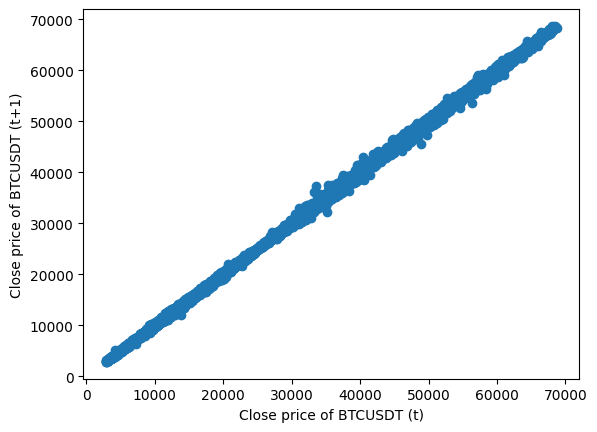

In [7]:
plt.scatter(df_px["shift"], df_px["close"])
plt.xlabel(f"Close price of {target_name} (t)")
plt.ylabel(f"Close price of {target_name} (t+1)")
plt.savefig("/Users/gpalazzo/Desktop/fig_closePx_target_scatter_t_t1.png")

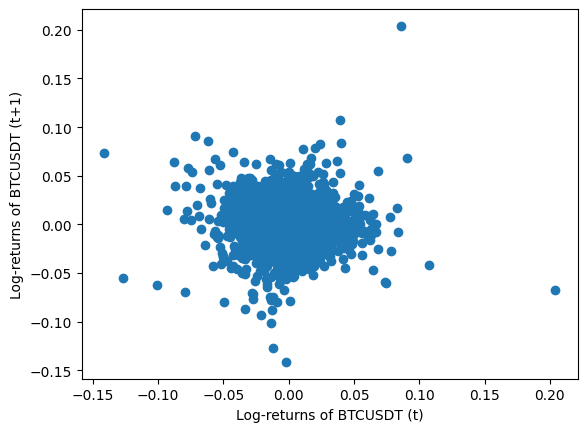

In [8]:
plt.scatter(df_logret["log_return_shift"], df_logret["log_return"])
plt.xlabel(f"Log-returns of {target_name} (t)")
plt.ylabel(f"Log-returns of {target_name} (t+1)")
plt.savefig("/Users/gpalazzo/Desktop/fig_logret_target_scatter_t_t1.png")

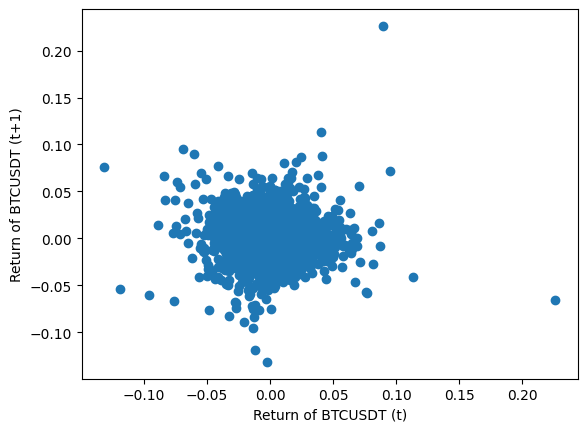

In [9]:
plt.scatter(df_pctchg["pctchg_shift"], df_pctchg["pctchg"])
plt.xlabel(f"Return of {target_name} (t)")
plt.ylabel(f"Return of {target_name} (t+1)")
plt.savefig("/Users/gpalazzo/Desktop/fig_pctchg_target_scatter_t_t1.png")